# Measuring Underserved Areas in the MTA

In [2]:
from src.load_mta_dataset import DATASETS, download_mta_data, load_mta_data

# Download and load MTA data
download_mta_data()
load_mta_data()

File data/gtfs_subway.zip already exists. Skipping download.
File data/gtfsmnr.zip already exists. Skipping download.
File data/gtfs_m.zip already exists. Skipping download.


/Users/Deena/Desktop/DS 501/ds-501-cs4/.venv/lib/python3.13/site-packages/gtfs_kit/feed.py:394: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(p, dtype=cs.DTYPE, encoding="utf-8-sig", **csv_options)


In [3]:
print(DATASETS)

[GTFSDataset(id='subway', url='https://rrgtfsfeeds.s3.amazonaws.com/gtfs_subway.zip', path=PosixPath('data/gtfs_subway.zip'), gk_feed=<gtfs_kit.feed.Feed object at 0x12dbf4ec0>), GTFSDataset(id='metro_north_railroad', url='https://rrgtfsfeeds.s3.amazonaws.com/gtfsmnr.zip', path=PosixPath('data/gtfsmnr.zip'), gk_feed=<gtfs_kit.feed.Feed object at 0x12dd3ca50>), GTFSDataset(id='manhattan_bus', url='https://rrgtfsfeeds.s3.amazonaws.com/gtfs_m.zip', path=PosixPath('data/gtfs_m.zip'), gk_feed=<gtfs_kit.feed.Feed object at 0x12dd3cb90>)]


In [4]:
subway_data = DATASETS[0]
subway_data.gk_feed.describe()

,indicator,value
0,agencies,[MTA New York City Transit]
1,timezone,America/New_York
2,start_date,20250323
3,end_date,20250518
4,num_routes,30
5,num_trips,20298
6,num_stops,1497
7,num_shapes,311
8,sample_date,20250327
9,num_routes_active_on_sample_date,28


In [5]:
subway_data.gk_feed.stops

,stop_id,stop_name,stop_lat,stop_lon,location_type,parent_station
0,101,Van Cortlandt Park-242 St,40.889248,-73.898583,1,<NA>
1,101N,Van Cortlandt Park-242 St,40.889248,-73.898583,<NA>,101
2,101S,Van Cortlandt Park-242 St,40.889248,-73.898583,<NA>,101
3,103,238 St,40.884667,-73.900870,1,<NA>
4,103N,238 St,40.884667,-73.900870,<NA>,103
...,...,...,...,...,...,...
1492,S30N,Tompkinsville,40.636949,-74.074835,<NA>,S30
1493,S30S,Tompkinsville,40.636949,-74.074835,<NA>,S30
1494,S31,St George,40.643748,-74.073643,1,<NA>
1495,S31N,St George,40.643748,-74.073643,<NA>,S31


In [6]:
# Get all stops without a parent station
stops = subway_data.gk_feed.stops
stops_no_parent = stops[stops.parent_station.isna()]
stops_no_parent.head(10)

,stop_id,stop_name,stop_lat,stop_lon,location_type,parent_station
0,101,Van Cortlandt Park-242 St,40.889248,-73.898583,1,<NA>
3,103,238 St,40.884667,-73.900870,1,<NA>
6,104,231 St,40.878856,-73.904834,1,<NA>
9,106,Marble Hill-225 St,40.874561,-73.909831,1,<NA>
12,107,215 St,40.869444,-73.915279,1,<NA>
15,108,207 St,40.864621,-73.918822,1,<NA>
18,109,Dyckman St,40.860531,-73.925536,1,<NA>
21,110,191 St,40.855225,-73.929412,1,<NA>
24,111,181 St,40.849505,-73.933596,1,<NA>
27,112,168 St-Washington Hts,40.840556,-73.940133,1,<NA>


In [7]:
from pathlib import Path
COMMUNITY_DISTRICTS_GEOJSON = Path("demographic_data/community_districts.geojson")
# Load the community districts GeoJSON file
import geopandas as gpd
community_districts = gpd.read_file(COMMUNITY_DISTRICTS_GEOJSON)
# Check the first few rows of the GeoDataFrame
print(community_districts.head())

   OBJECTID  BoroCD   Shape__Area  Shape__Length  \
0         1     308  4.560379e+07   38232.887315   
1         2     410  1.720774e+08  105822.377352   
2         3     206  4.266432e+07   35875.709939   
3         4     480  3.277756e+07   47338.739592   
4         5     104  4.931005e+07   67546.045457   

                                            geometry  
0  POLYGON ((-73.95829 40.67984, -73.95596 40.679...  
1  MULTIPOLYGON (((-73.85722 40.65029, -73.85902 ...  
2  POLYGON ((-73.87185 40.84377, -73.87192 40.843...  
3  POLYGON ((-73.86272 40.76668, -73.86281 40.766...  
4  POLYGON ((-73.99394 40.77319, -73.9937 40.7730...  


In [8]:
# Create a geopandas DataFrame from the subway stops
subway_stops_gdf = gpd.GeoDataFrame(
    stops_no_parent,
    geometry=gpd.points_from_xy(stops_no_parent.stop_lon, stops_no_parent.stop_lat),
    crs="EPSG:4326"
)

print(subway_stops_gdf.head())

   stop_id                  stop_name   stop_lat   stop_lon  location_type  \
0      101  Van Cortlandt Park-242 St  40.889248 -73.898583              1   
3      103                     238 St  40.884667 -73.900870              1   
6      104                     231 St  40.878856 -73.904834              1   
9      106         Marble Hill-225 St  40.874561 -73.909831              1   
12     107                     215 St  40.869444 -73.915279              1   

   parent_station                    geometry  
0            <NA>  POINT (-73.89858 40.88925)  
3            <NA>  POINT (-73.90087 40.88467)  
6            <NA>  POINT (-73.90483 40.87886)  
9            <NA>  POINT (-73.90983 40.87456)  
12           <NA>  POINT (-73.91528 40.86944)  


In [9]:
import plotly.express as px
from src.underserved_areas import generate_uniform_points_by_count, compute_dist_to_nearest_point

N_SAMPLES = 10000

sampled_points = generate_uniform_points_by_count(community_districts, n_points=N_SAMPLES)

sampled_points["lon"] = sampled_points.geometry.x
sampled_points["lat"] = sampled_points.geometry.y

sampled_points = compute_dist_to_nearest_point(sampled_points, subway_stops_gdf)

# Make a scatter map where the color of the points is based on the distance to the nearest subway stop
# map_nyc = px.scatter_map(
#     sampled_points,
#     lat="lat",
#     lon="lon",
#     color="Distance to Nearest Stop (km)",
#     color_continuous_scale="redor",
#     zoom=9,
#     height=600,
#     width=800,
#     title="Distance to Nearest Subway Stop"
# )

# # Plot the subway stops on the map
# map_nyc.add_trace(
#     px.scatter_map(
#         subway_stops_gdf,
#         lat="stop_lat",
#         lon="stop_lon",
#         hover_name="stop_name",
#         color_discrete_sequence=["blue"],
#         opacity=0.5,
#     ).data[0]
# )

# # Update the layout to use OpenStreetMap style
# map_nyc.update_layout(
#     title_text="Distance to Nearest Subway Stop", 
#     mapbox_style="open-street-map",
# )

# map_nyc.show()

# Conjecture
Community districts with high population density, on average, have lower incomes.

In [10]:
from src.load_demographic_data import load_demographic_data, DEMOGRAPHIC_DATASETS

# Load demographic data
load_demographic_data()

# Get the median income and population datasets
median_income_data = DEMOGRAPHIC_DATASETS[0]
total_population_data = DEMOGRAPHIC_DATASETS[1]

print()

# Check the first few rows of the median income dataset
print(median_income_data.dataframe.head())

# Check the columns of the median income dataset
print(median_income_data.dataframe.columns)

# Check the first few rows of the total population dataset
print(total_population_data.dataframe.head())

# Check the columns of the total population dataset
print(total_population_data.dataframe.columns)

Loaded Median Incomes from demographic_data/median_incomes.csv
Loaded Total Population from demographic_data/total_population.csv
Loaded Total Population by Race Ethnicity from demographic_data/total_population_by_race_ethnicity.csv
Loaded Total Population by Age Group from demographic_data/total_population_by_age_group.csv

               Location             Household Type  TimeFrame DataFormat  \
0               Astoria             All Households       2023    Dollars   
1               Astoria                   Families       2023    Dollars   
2               Astoria     Families with Children       2023    Dollars   
3               Astoria  Families without Children       2023    Dollars   
4  Battery Park/Tribeca             All Households       2023    Dollars   

     Data  Fips  
0   84590   401  
1   94918   401  
2   85568   401  
3  110222   401  
4  198945   101  
Index(['Location', 'Household Type', 'TimeFrame', 'DataFormat', 'Data',
       'Fips'],
      dtype='object'

In [11]:
# Get the most recent timeframe for the median income dataset
most_recent_timeframe = median_income_data.dataframe["TimeFrame"].max()
print(f"Most recent timeframe: {most_recent_timeframe}")

# Make sure that there is a row for the most recent timeframe for all locations
# in the median income dataset
recent_timeframe_rows = median_income_data.dataframe[
    median_income_data.dataframe["TimeFrame"] == most_recent_timeframe
]
assert median_income_data.dataframe["Location"].nunique() == recent_timeframe_rows["Location"].nunique(), \
    "Not all locations have a row for the most recent timeframe in the median income dataset."

# Filter the median income dataset to include the following
# - "Household Type" = "All Households"
filtered_median_income = recent_timeframe_rows[
    recent_timeframe_rows["Household Type"] == "All Households"
]

# Check the first few rows of the filtered median income dataset
print(filtered_median_income.head())

Most recent timeframe: 2023
                Location  Household Type  TimeFrame DataFormat    Data  Fips
0                Astoria  All Households       2023    Dollars   84590   401
4   Battery Park/Tribeca  All Households       2023    Dollars  198945   101
8              Bay Ridge  All Households       2023    Dollars   88566   310
12               Bayside  All Households       2023    Dollars  107607   411
16          Bedford Park  All Households       2023    Dollars   42387   207


In [12]:
# Get the most recent timeframe for the median income dataset
most_recent_timeframe = total_population_data.dataframe["TimeFrame"].max()
print(f"Most recent timeframe: {most_recent_timeframe}")

# Make sure that there is a row for the most recent timeframe for all locations
recent_timeframe_rows = total_population_data.dataframe[
    total_population_data.dataframe["TimeFrame"] == most_recent_timeframe
]
assert total_population_data.dataframe["Location"].nunique() == recent_timeframe_rows["Location"].nunique(), \
    "Not all locations have a row for the most recent timeframe in the median income dataset."

filtered_total_population = recent_timeframe_rows

# Check the first few rows of the filtered total population dataset
print(filtered_total_population.head())

Most recent timeframe: 2022
                       Location  TimeFrame DataFormat      Data Fips
2890       Battery Park/Tribeca       2022     Number   68418.0  101
2891          Greenwich Village       2022     Number   80684.0  102
2892            Lower East Side       2022     Number  141787.0  103
2893            Chelsea/Clinton       2022     Number  112582.0  104
2894  Midtown Business District       2022     Number   52570.0  105


In [13]:
# Align the median income and total population datasets on the Location column
filtered_median_income = filtered_median_income.set_index("Location")
filtered_total_population = filtered_total_population.set_index("Location")
filtered_median_income = filtered_median_income.loc[filtered_total_population.index]
filtered_total_population = filtered_total_population.loc[filtered_median_income.index]

In [14]:
import pandas as pd

# Convert the data column to numeric for both datasets
filtered_median_income["Data"] = pd.to_numeric(filtered_median_income["Data"], errors="coerce")
filtered_total_population["Data"] = pd.to_numeric(filtered_total_population["Data"], errors="coerce")

In [15]:
print(filtered_median_income.head())
print(filtered_total_population.head())

                           Household Type  TimeFrame DataFormat    Data  Fips
Location                                                                     
Battery Park/Tribeca       All Households       2023    Dollars  198945   101
Greenwich Village          All Households       2023    Dollars  198945   102
Lower East Side            All Households       2023    Dollars   54482   103
Chelsea/Clinton            All Households       2023    Dollars  122723   104
Midtown Business District  All Households       2023    Dollars  144175   105
                           TimeFrame DataFormat      Data Fips
Location                                                      
Battery Park/Tribeca            2022     Number   68418.0  101
Greenwich Village               2022     Number   80684.0  102
Lower East Side                 2022     Number  141787.0  103
Chelsea/Clinton                 2022     Number  112582.0  104
Midtown Business District       2022     Number   52570.0  105


In [16]:
from src.load_census_data import load_census_data, get_area_by_fips_code, GEOJSON_DATASET

# Load census data
load_census_data()

In [17]:
fips = filtered_total_population["Fips"]

areas = get_area_by_fips_code(fips)
print(areas)

    Fips  Area (km^2)
0    101     7.224043
1    102     6.119568
2    103     7.579787
3    104     7.758009
4    105     6.365355
5    106     6.956614
6    107     8.792266
7    108     9.449743
8    109     6.897338
9    110     6.183471
10   111    10.704405
11   112    12.629904
12   201    12.354868
13   202     9.922601
14   203     7.464240
15   204     9.358614
16   205     6.429054
17   206     7.111113
18   207     9.491898
19   208    13.452351
20   209    18.185304
21   210    27.978013
22   211    16.425201
23   212    24.340185
24   301    21.229758
25   302    12.234741
26   303    12.598806
27   304     9.129683
28   305    26.641602
29   306    13.954589
30   307    16.987039
31   308     7.560612
32   309     7.098861
33   310    17.561566
34   311    16.559264
35   312    16.254589
36   313    14.635916
37   314    12.730436
38   315    20.184914
39   316     8.192347
40   317    15.089275
41   318    40.063597
42   401    25.163524
43   402    21.192367
44   403  

/Users/Deena/Desktop/DS 501/ds-501-cs4/.venv/lib/python3.13/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [18]:
# Convert the Fips column to integers
filtered_total_population["Fips"] = filtered_total_population["Fips"].astype(int)

# For filtered total population, join with the areas on Fips
filtered_total_population = filtered_total_population.join(areas.set_index("Fips"), on="Fips")

# Compute population density
filtered_total_population["Population Density"] = (
    filtered_total_population["Data"] / filtered_total_population["Area (km^2)"]
)

In [22]:
#compare median income to ridership 
#compare population density to ridership 
#load weaver code
#plot median income and regression and correlation coefficient 
#plot population denisty and regression and correlation coefficient

from src.load_ridership_data import load_ridership_data
load_ridership_data()


,Station,borough,Line,2017 Weekday,2017 Weekend,#,2012 Weekday,2012 Weekend,2013 Weekday,2013 Weekend,...,2016-2017 Weekend Change,2017 Weekday Rank,2017 Weekend Rank,F20,F22,Latitude,Longitude,Notes,Number of Records,Fips
0,1st Avenue,Manhattan,L,21823,28252,1,22436.0,30928.0,23467.0,32724.0,...,-3918.0,65.0,41,-1.22,-0.59,40.730975,-73.981681,L-all times,1,103
1,103rd Street - 1,Manhattan,1,12818,15651,2,13557.0,17811.0,13501.0,18131.0,...,-953.0,128.0,99,-0.57,-0.32,40.799446,-73.968379,1-all times,1,107
2,103rd Street - 4-6,Manhattan,4-6-6 Express,14337,13921,3,15721.0,16997.0,16189.0,16793.0,...,-43.0,110.0,122,-0.03,0.25,40.790600,-73.947478,"4-nights, 6-all times, 6 Express-weekdays AM s...",1,111
3,103rd Street - A-B-C,Manhattan,A-B-C,4674,5191,4,4659.0,5599.0,4761.0,5799.0,...,374.0,308.0,286,0.78,-0.21,40.796061,-73.961370,"A-nights, B-weekdays and evenings, C-all times...",1,164
4,103rd Street - Corona Plaza,Queens,7,20101,25432,5,18984.0,25246.0,19216.0,26098.0,...,1149.0,72.0,46,0.47,-0.09,40.749865,-73.862700,7-all times,1,404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,Woodhaven Boulevard - E-M-R,Queens,E-M-R,21879,23929,421,22521.0,27847.0,22276.0,27194.0,...,-1621.0,64.0,52,-0.63,-0.27,40.733097,-73.869432,"E-nights, R-all other times, M-weekdays and ev...",1,404
421,Woodlawn,Bronx,4,7260,7271,422,7797.0,8577.0,7776.0,8125.0,...,-73.9,221.0,228,-0.92,-0.48,40.886037,-73.878751,4-all times,1,207
422,Woodside - 61 Street,Queens,7-7 Express,16945,21067,423,16698.0,20031.0,16559.0,20432.0,...,707.0,84.0,67,0.35,-0.17,40.745630,-73.902984,"7-all times, 7 Express-rush hours AM westbound...",1,402
423,York Street,Brooklyn,F,10373,9945,424,7798.0,7261.0,8629.0,8672.0,...,-2576.0,158.0,173,-2.06,0.12,40.699743,-73.986885,F-all times,1,302


In [24]:
import pandas as pd

#load csv
df = pd.read_csv("demographic_data/ridership_data.csv")

# Convert all columns to numeric 
df = df.apply(pd.to_numeric, errors='coerce')

# Print the new column types
print("\nUpdated dtypes:")
print(df.dtypes)



Updated dtypes:
Station                     float64
borough                     float64
Line                        float64
2017 Weekday                  int64
2017 Weekend                  int64
#                             int64
2012 Weekday                float64
2012 Weekend                float64
2013 Weekday                float64
2013 Weekend                float64
2014 Weekday                float64
2014 Weekend                float64
2015 Weekday                float64
2015 Weekend                float64
2016 Weekday                float64
2016 Weekend                float64
2016-2017 Weekday Change    float64
2016-2017 Weekend Change    float64
2017 Weekday Rank           float64
2017 Weekend Rank             int64
F20                         float64
F22                         float64
Latitude                    float64
Longitude                   float64
Notes                       float64
Number of Records             int64
Fips                          int64
dtype: obje

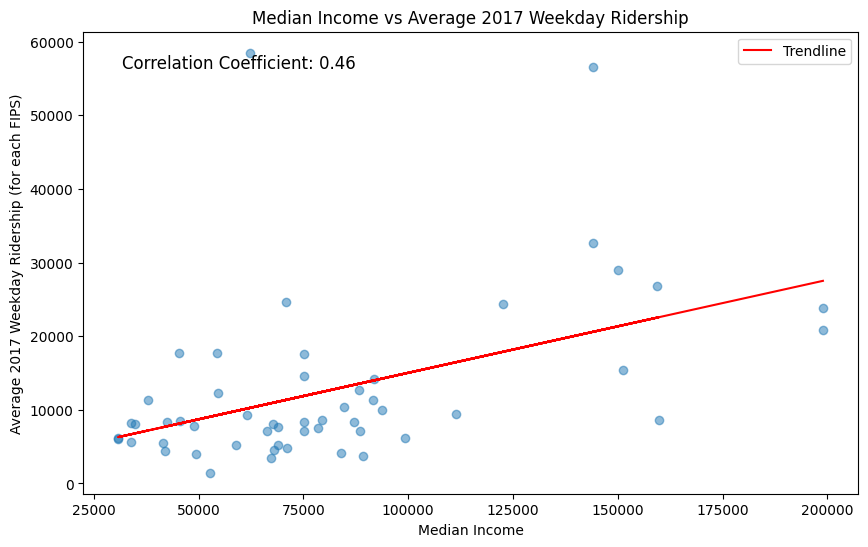

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

income_df = (
    filtered_median_income.reset_index()[["Fips", "Data"]]
    .rename(columns={"Data": "Median Income"}))

df["Fips"] = pd.to_numeric(df["Fips"], errors="coerce")
df["2017 Weekday"] = pd.to_numeric(df["2017 Weekday"], errors="coerce")

ridership_avg = (
    df.groupby("Fips")["2017 Weekday"]
    .mean()
    .reset_index()
    .rename(columns={"2017 Weekday": "Average Weekday Ridership"})
)

#print(ridership_avg.head())

merged = pd.merge(income_df, ridership_avg, on="Fips", how="inner")
#print(merged.head())
merged = merged.dropna()

x = merged["Median Income"]
y = merged["Average Weekday Ridership"]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)

plt.title("Median Income vs Average 2017 Weekday Ridership")
plt.xlabel("Median Income")
plt.ylabel("Average 2017 Weekday Ridership (for each FIPS)")

# Regression 
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color="red", label="Trendline")
plt.legend()

# Correlation coefficient
correlation_coefficient = x.corr(y)
plt.text(
    0.05,
    0.95,
    f"Correlation Coefficient: {correlation_coefficient:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment="top",
)

plt.show()

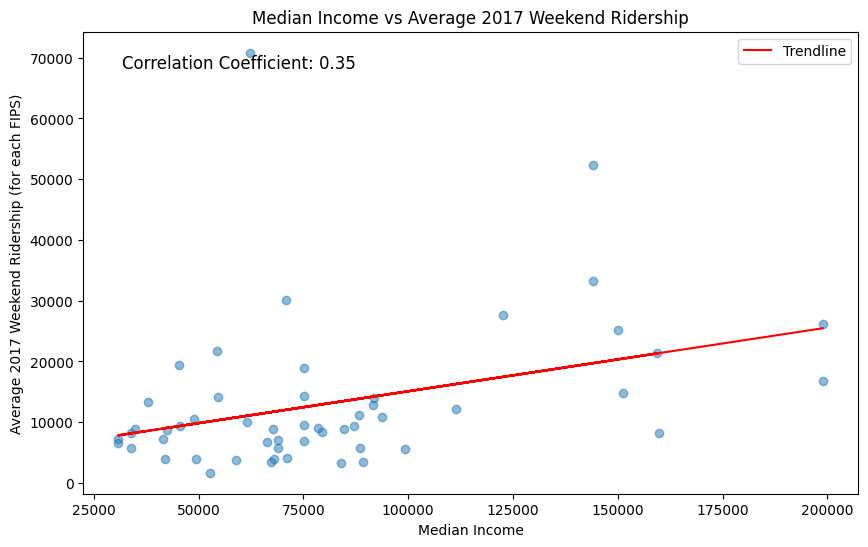

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

income_df = (
    filtered_median_income.reset_index()[["Fips", "Data"]]
    .rename(columns={"Data": "Median Income"}))

df["Fips"] = pd.to_numeric(df["Fips"], errors="coerce")
df["2017 Weekend"] = pd.to_numeric(df["2017 Weekend"], errors="coerce")

ridership_avg = (
    df.groupby("Fips")["2017 Weekend"]
    .mean()
    .reset_index()
    .rename(columns={"2017 Weekend": "Average Weekend Ridership"})
)

merged = pd.merge(income_df, ridership_avg, on="Fips", how="inner")
merged = merged.dropna()

x = merged["Median Income"]
y = merged["Average Weekend Ridership"]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)

plt.title("Median Income vs Average 2017 Weekend Ridership")
plt.xlabel("Median Income")
plt.ylabel("Average 2017 Weekend Ridership (for each FIPS)")

# Regression 
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color="red", label="Trendline")
plt.legend()

# Correlation coefficient
correlation_coefficient = x.corr(y)
plt.text(
    0.05,
    0.95,
    f"Correlation Coefficient: {correlation_coefficient:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment="top",
)

plt.show()

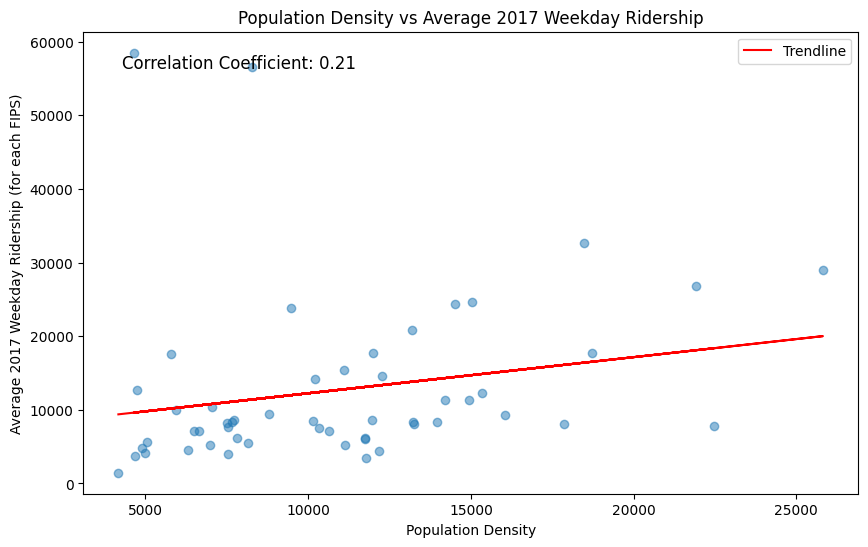

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

income_df = (
    filtered_median_income.reset_index()[["Fips", "Data"]]
    .rename(columns={"Data": "Median Income"}))

df["Fips"] = pd.to_numeric(df["Fips"], errors="coerce")
df["2017 Weekday"] = pd.to_numeric(df["2017 Weekday"], errors="coerce")

ridership_avg = (
    df.groupby("Fips")["2017 Weekday"]
    .mean()
    .reset_index()
    .rename(columns={"2017 Weekday": "Average Weekday Ridership"}))

population_density_df = filtered_total_population[["Fips", "Population Density"]]

merged = pd.merge(ridership_avg, population_density_df, on="Fips", how="inner")
merged = merged.dropna()

x = merged["Population Density"]
y = merged["Average Weekday Ridership"]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)

plt.title("Population Density vs Average 2017 Weekday Ridership")
plt.xlabel("Population Density")
plt.ylabel("Average 2017 Weekday Ridership (for each FIPS)")

# Regression 
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color="red", label="Trendline")
plt.legend()

# Correlation coefficient
correlation_coefficient = x.corr(y)
plt.text(
    0.05,
    0.95,
    f"Correlation Coefficient: {correlation_coefficient:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment="top",
)

plt.show()

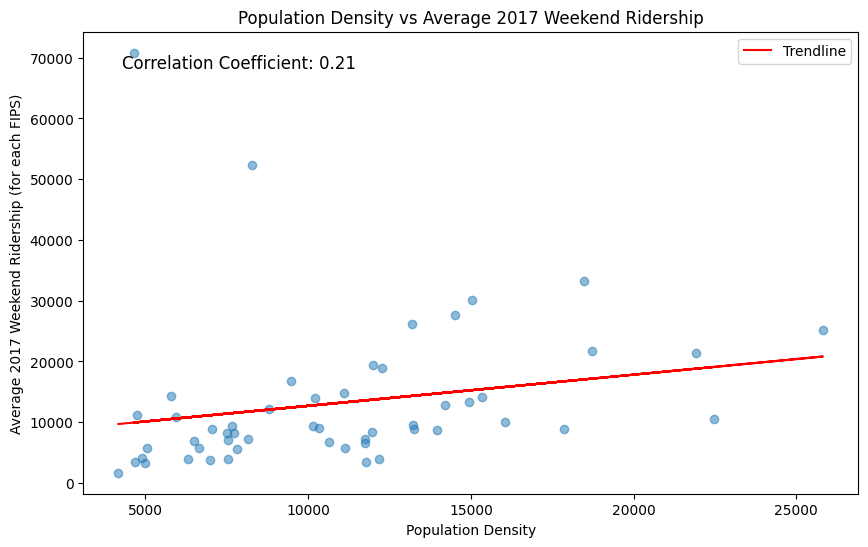

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

income_df = (
    filtered_median_income.reset_index()[["Fips", "Data"]]
    .rename(columns={"Data": "Median Income"}))

df["Fips"] = pd.to_numeric(df["Fips"], errors="coerce")
df["2017 Weekend"] = pd.to_numeric(df["2017 Weekend"], errors="coerce")

ridership_avg = (
    df.groupby("Fips")["2017 Weekend"]
    .mean()
    .reset_index()
    .rename(columns={"2017 Weekend": "Average Weekend Ridership"}))

population_density_df = filtered_total_population[["Fips", "Population Density"]]

merged = pd.merge(ridership_avg, population_density_df, on="Fips", how="inner")
merged = merged.dropna()

x = merged["Population Density"]
y = merged["Average Weekend Ridership"]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)

plt.title("Population Density vs Average 2017 Weekend Ridership")
plt.xlabel("Population Density")
plt.ylabel("Average 2017 Weekend Ridership (for each FIPS)")

# Regression 
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color="red", label="Trendline")
plt.legend()

# Correlation coefficient
correlation_coefficient = x.corr(y)
plt.text(
    0.05,
    0.95,
    f"Correlation Coefficient: {correlation_coefficient:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment="top",
)

plt.show()